In [2]:
# for data manipulation
import pandas as pd
import numpy as np
import pickle

# for visualization
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

# for modeling
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

/Users/chesh1/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [3]:
with open('converted_data_simple.txt', 'rb') as fp:
    converted_data_simple = pickle.load(fp)

In [4]:
converted_data_simple.drop(columns = ['brok'], inplace = True)



In [5]:
model_data = pd.get_dummies(converted_data_simple, prefix = 't', columns = ['type'], drop_first = True)

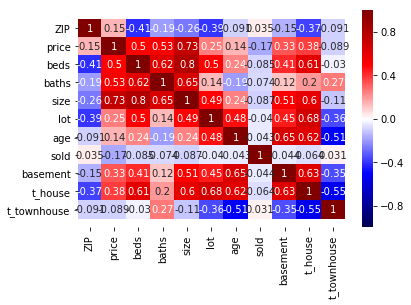

In [34]:
sbn.heatmap(model_data.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)
plt.gca().set_ylim(len(model_data.corr())+0.5, -0.5);

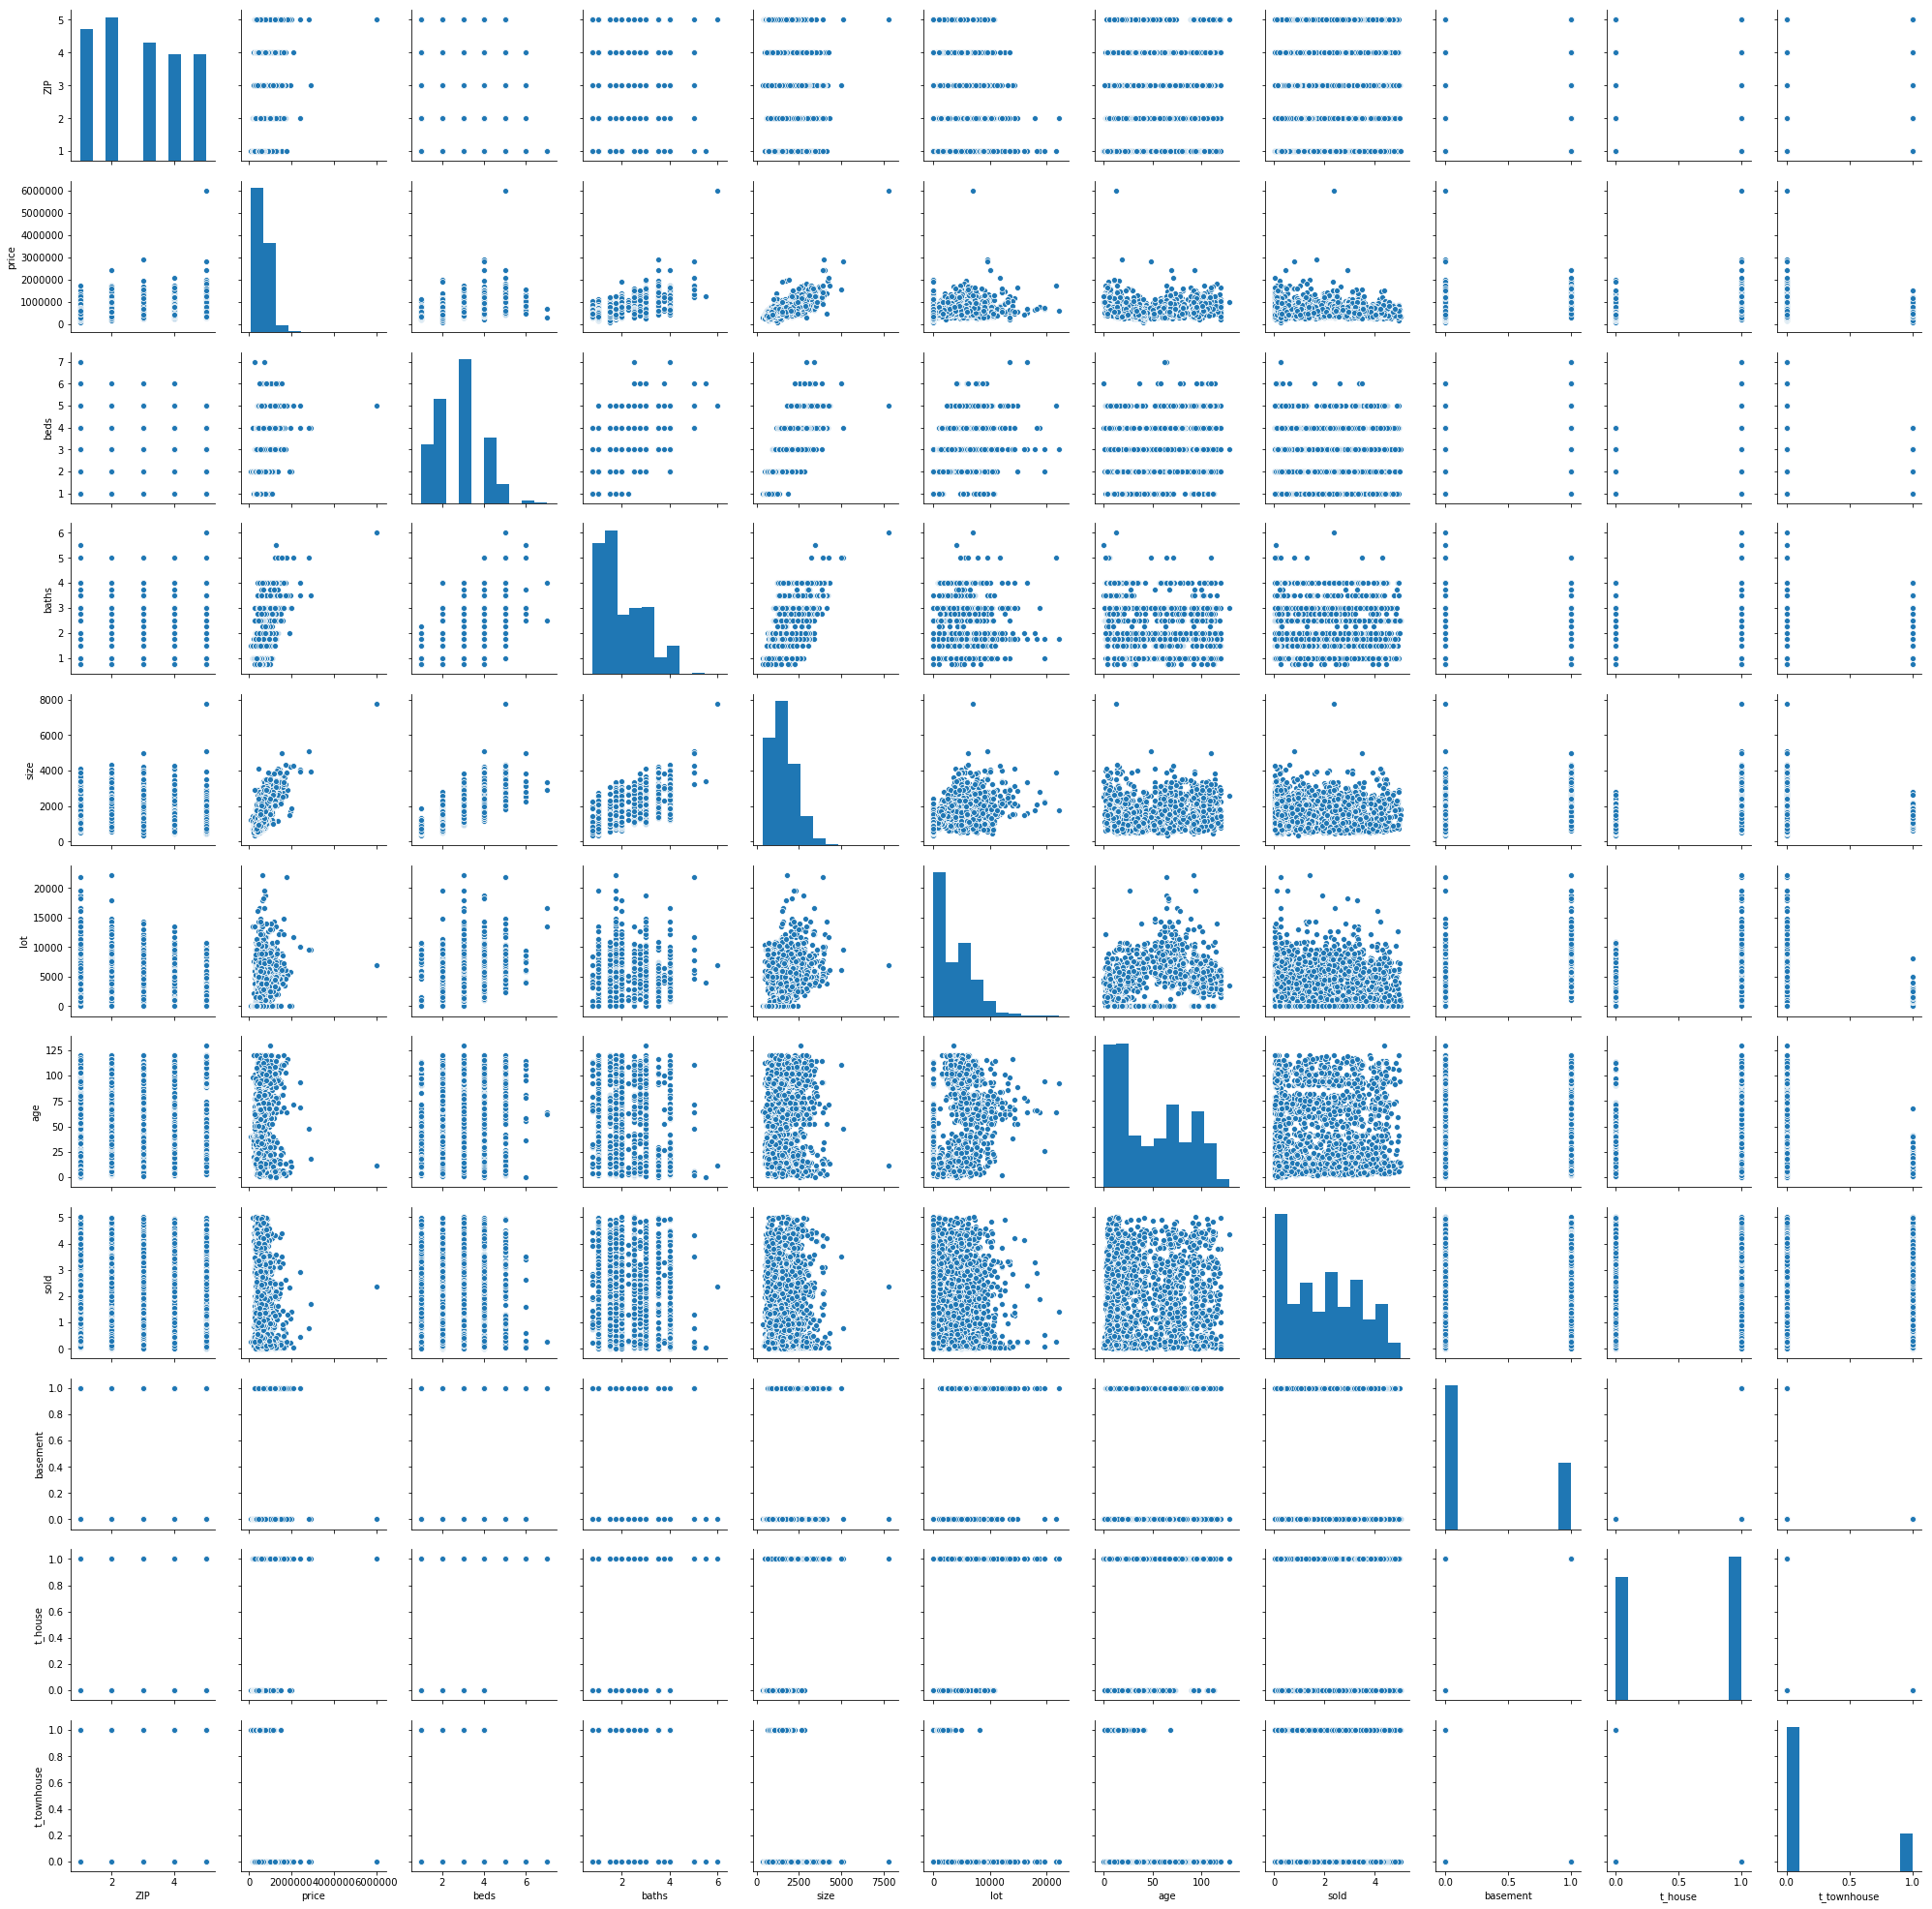

In [76]:
paired_graphs = sbn.pairplot(model_data)

In [6]:
# One $6M house was fine in terms of size and price but was throwing off a lot of other interactions
mansion_mask = model_data['price'] < 4000000
model_data = model_data[mansion_mask]
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2150 entries, 0 to 3104
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ZIP          2150 non-null   float64
 1   price        2150 non-null   float64
 2   beds         2150 non-null   float64
 3   baths        2150 non-null   float64
 4   size         2150 non-null   float64
 5   lot          2150 non-null   float64
 6   age          2150 non-null   int64  
 7   sold         2150 non-null   float64
 8   basement     2150 non-null   int64  
 9   t_house      2150 non-null   uint8  
 10  t_townhouse  2150 non-null   uint8  
dtypes: float64(7), int64(2), uint8(2)
memory usage: 172.2 KB


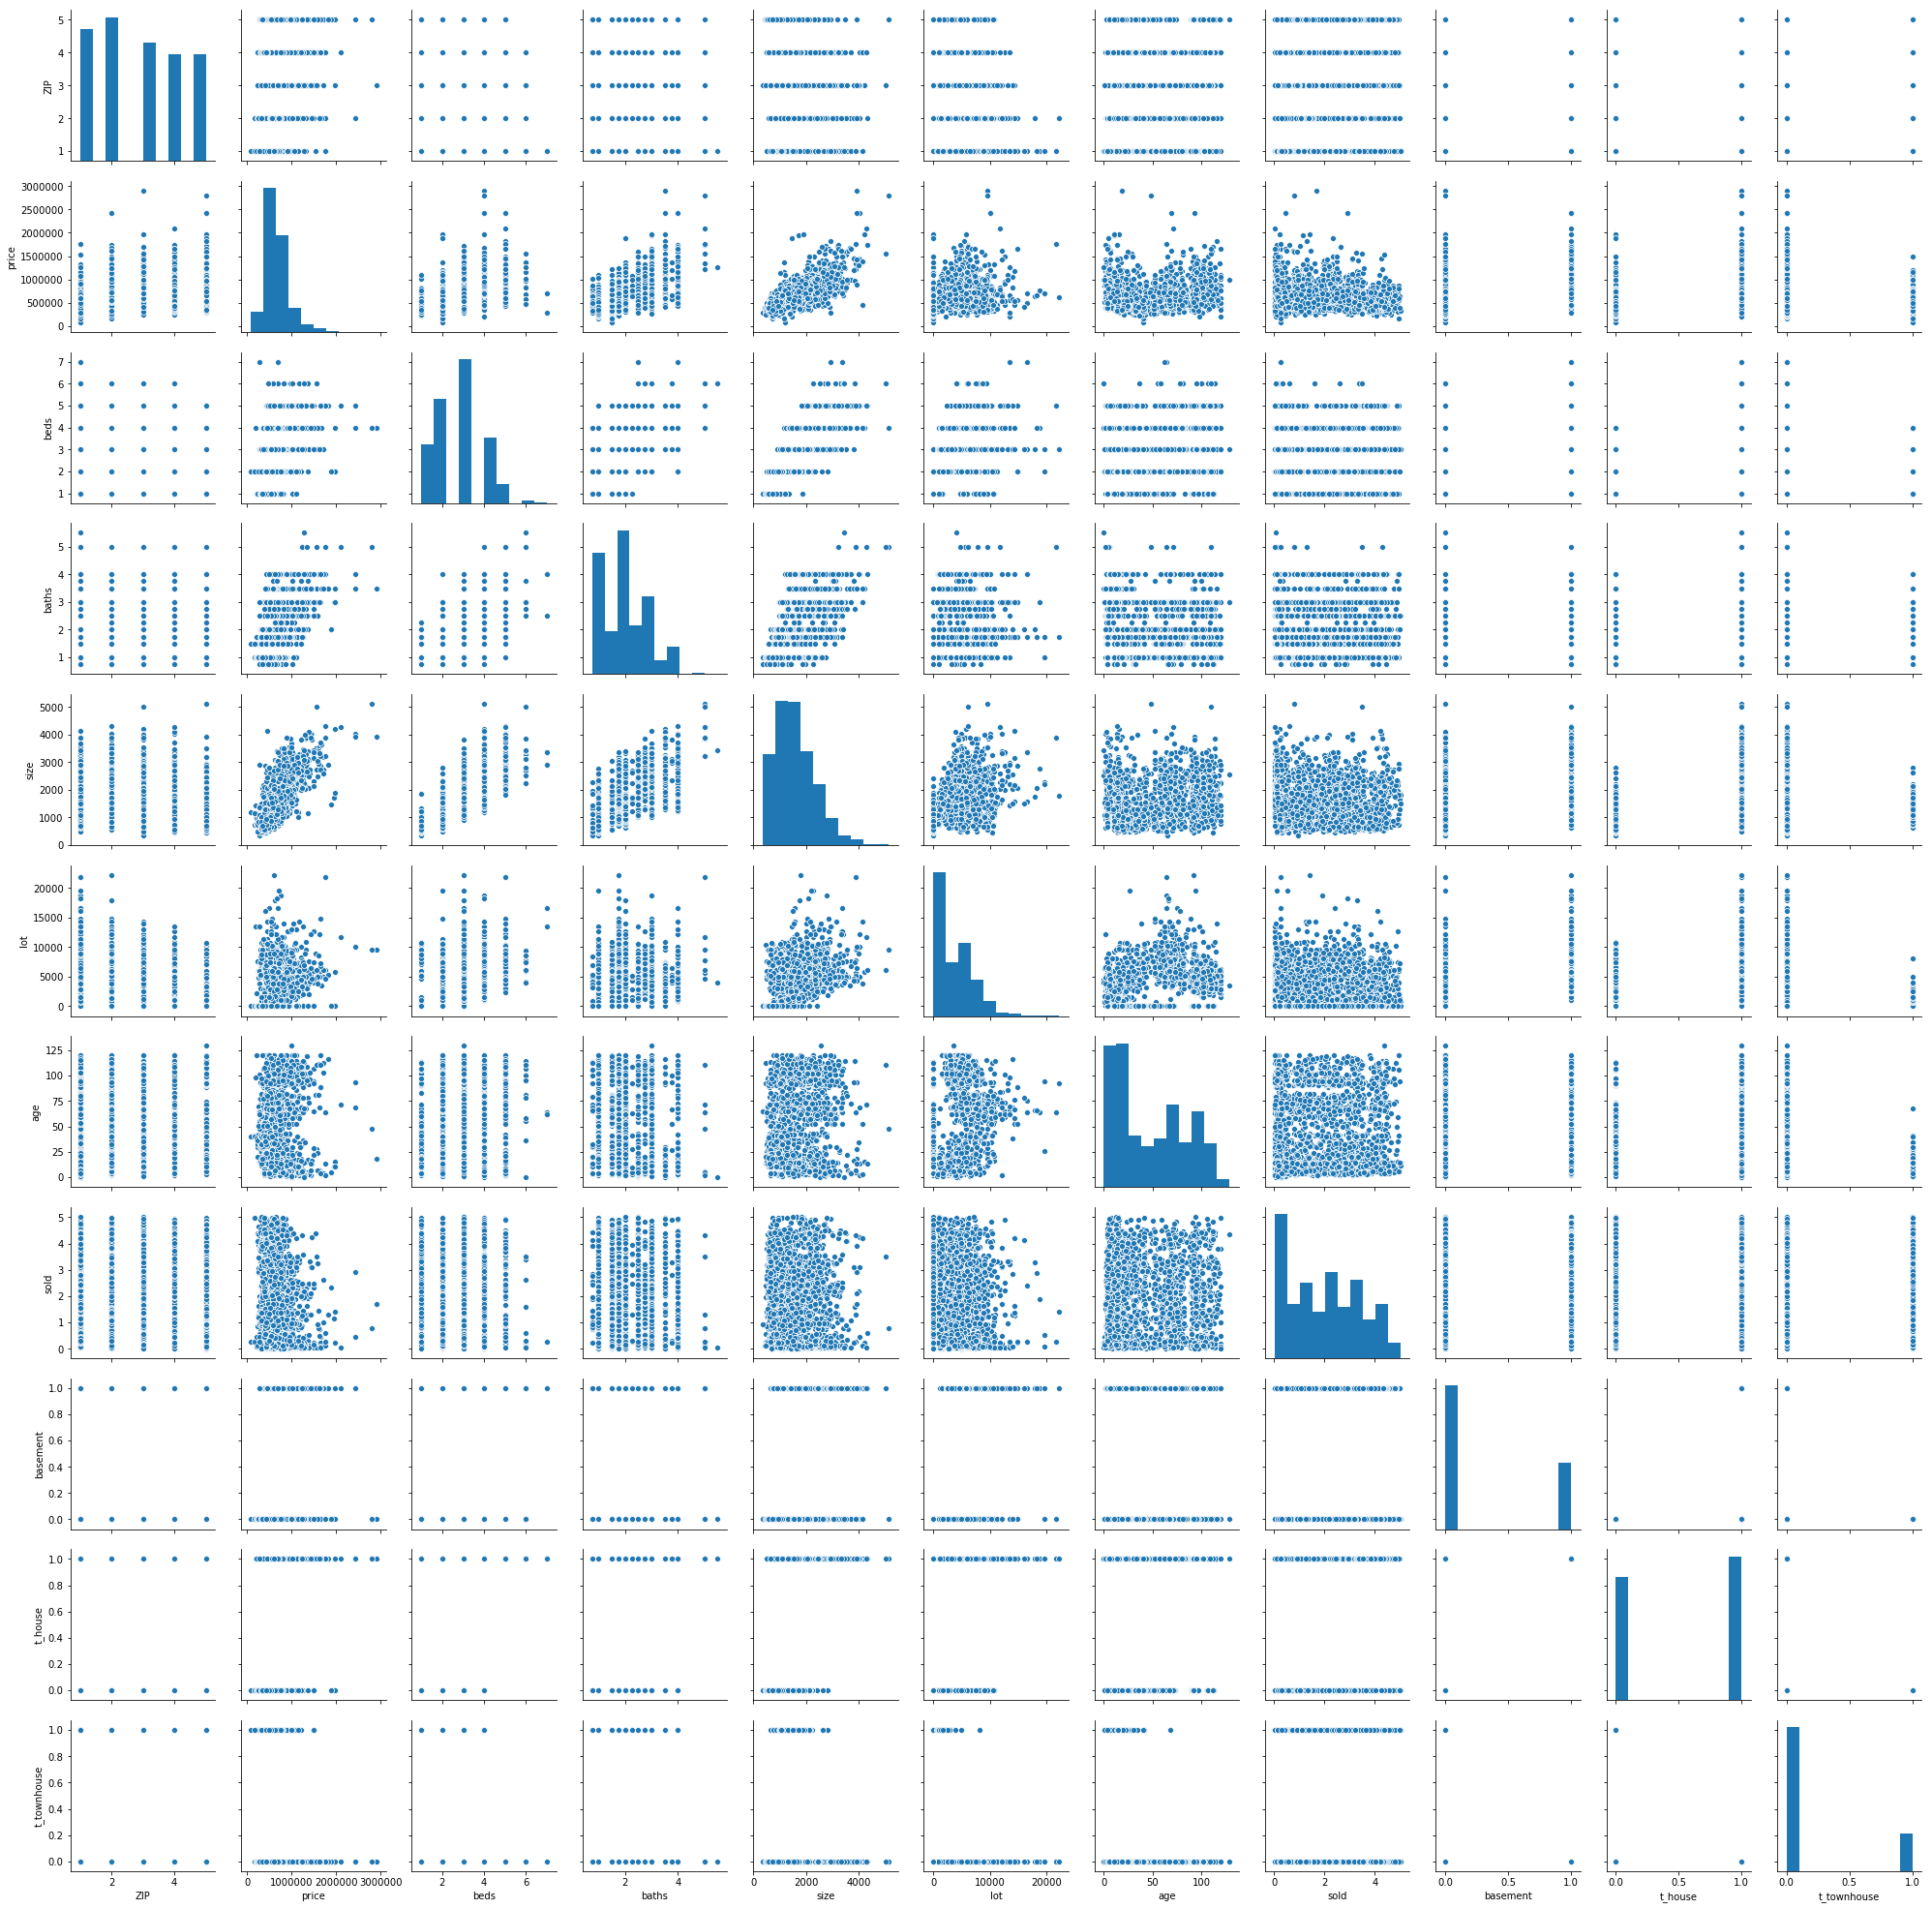

In [93]:
sbn.pairplot(model_data)

In [7]:
linreg = LinearRegression()
X = model_data[['ZIP', 'beds', 'baths', 'size', 'lot', 'age', 'sold', 'basement', 't_house', 't_townhouse']]
y = model_data['price']
# Splitting data into test/validate (60-20%) and holdout (20%); random states generated by random.org
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=11)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=95)

In [81]:
linreg.fit(X_train, y_train)
print(linreg.score(X_train, y_train))
print(linreg.score(X_val, y_val))

0.6893931010197125
0.7277421900345723


# Model is already doing a halfway decent job
It's probably predicting better than half the variance in the data (R-squared of 0.7 on validation data), and the R-squared isn't higher for the training set; most likely explanation is outliers in the training set.

In [8]:
# Getting this going again without overwriting model or train/val sets I want to use again.
linreg2 = LinearRegression()
X_train_val2, X_test2, y_train_val2, y_test2 = train_test_split(X, y, test_size=0.2,random_state=93)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train_val2, y_train_val2, test_size=.25, random_state=98)
linreg2.fit(X_train2, y_train2)
print(linreg2.score(X_train2, y_train2))
print(linreg2.score(X_val2, y_val2))

0.6979937111117065
0.7067257632881139


In [10]:
# Getting this going again without overwriting model or train/val sets I want to use again.
linreg3 = LinearRegression()
X_train_val3, X_test3, y_train_val3, y_test3 = train_test_split(X, y, test_size=0.2,random_state=46)
X_train3, X_val3, y_train3, y_val3 = train_test_split(X_train_val3, y_train_val3, test_size=.25, random_state=70)
linreg3.fit(X_train3, y_train3)
print(linreg3.score(X_train3, y_train3))
print(linreg3.score(X_val3, y_val3))

0.6963153434647369
0.7011435045718986


In [84]:
# Getting this going again without overwriting model or train/val sets I want to use again.
linreg4 = LinearRegression()
X_train_val4, X_test4, y_train_val4, y_test4 = train_test_split(X, y, test_size=0.2,random_state=20)
X_train4, X_val4, y_train4, y_val4 = train_test_split(X_train_val4, y_train_val4, test_size=.25, random_state=88)
linreg4.fit(X_train4, y_train4)
print(linreg4.score(X_train4, y_train4))
print(linreg4.score(X_val4, y_val4))

0.6870999968225877
0.7422022602259799


OK, probably some outliers (several) throwing things off. Fine tuning of model will therefore probably involve doing a bit of a deeper dive into the pairgrid and throwing out the rows with extreme values.

Next question is the interaction terms. I would very much expect lot size to be a large consideration for a house but minimal or completely irrelevant for a townhouse or condo.

In [85]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures()
X_train_poly = pf.fit_transform(X_train)

linreg_poly = LinearRegression()
linreg_poly.fit(X_train_poly, y_train)
linreg_poly.score(X_train_poly, y_train)

0.7793962539118701

In [41]:
list(zip(pf.get_feature_names(X_train.columns), linreg_poly.coef_))

[('1', 0.0013458008281460403),
 ('ZIP', 47122.740217810846),
 ('beds', 64153.54674120034),
 ('baths', -66820.40665082507),
 ('size', 328.66909604751424),
 ('lot', -25.71053595800565),
 ('age', -2946.216079629124),
 ('sold', 122947.60704461989),
 ('basement', 41720.75739159327),
 ('t_house', 133964.02405960963),
 ('t_townhouse', 116719.63683524978),
 ('ZIP^2', -1503.8624883030047),
 ('ZIP beds', 1551.1316423374558),
 ('ZIP baths', 5347.320210863828),
 ('ZIP size', 39.70674101861576),
 ('ZIP lot', 2.00260298017929),
 ('ZIP age', -38.59324892479822),
 ('ZIP sold', -6679.580326476909),
 ('ZIP basement', -19474.385016044325),
 ('ZIP t_house', -17974.9150016089),
 ('ZIP t_townhouse', -24055.892268482752),
 ('beds^2', 1684.5109471929266),
 ('beds baths', -3162.8534373008647),
 ('beds size', -70.4477499270979),
 ('beds lot', -9.8954563529187),
 ('beds age', 178.51503082262235),
 ('beds sold', -2648.7260235394956),
 ('beds basement', 28184.038603369598),
 ('beds t_house', 95669.6119125959),
 ('

In [86]:
X_val_poly = pf.fit_transform(X_val)
linreg_poly.score(X_val_poly, y_val)

0.7723346989222409

Before removing the mansion, R-square for X_train_poly is 0.83, for X_val_poly is 0.73; definitely overfit. Going to LASSO to figure out what terms should get dropped. Afterward, much less skewed (0.80 train, 0.77 test), but still want to figure out what polynomial terms are actually useful.

In [87]:
std = StandardScaler()
std.fit(X_train.values)
X_train_sc = std.transform(X_train.values)
X_val_sc = std.transform(X_val.values)
X_train_polysc = pf.fit_transform(X_train_sc)
X_val_polysc = pf.fit_transform(X_val_sc)

/Users/chesh1/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/chesh1/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/chesh1/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/chesh1/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did no

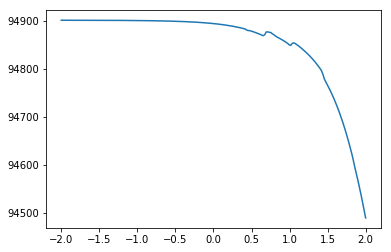

In [88]:
# Finding an alpha to minimize total error
alphalist = 10**(np.linspace(-2,2,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

for i,curr_alpha in enumerate(alphalist):
    lasso = Lasso(alpha = curr_alpha)
    lasso.fit(X_train_polysc, y_train)
    val_set_pred = lasso.predict(X_val_polysc)
    err_vec_val[i] = mae(y_val, val_set_pred)

plt.plot(np.log10(alphalist), err_vec_val)

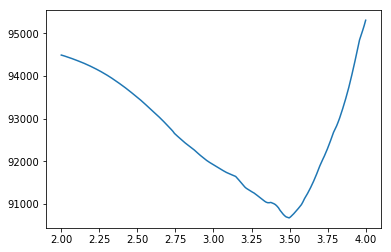

In [89]:
# Finding an alpha to minimize total error
alphalist = 10**(np.linspace(2,4,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))
min_error = 100000
best_alpha = 0

for i,curr_alpha in enumerate(alphalist):
    lasso = Lasso(alpha = curr_alpha)
    lasso.fit(X_train_polysc, y_train)
    val_set_pred = lasso.predict(X_val_polysc)
    this_mae = mae(y_val, val_set_pred)
    if min_error > this_mae:
        min_error = this_mae
        best_alpha = curr_alpha
    err_vec_val[i] = this_mae

plt.plot(np.log10(alphalist), err_vec_val)

In [90]:
best_alpha

3144.0354715915

In [91]:
lasso_opt = Lasso(alpha = best_alpha)
lasso_opt.fit(X_train_polysc, y_train)

Lasso(alpha=3144.0354715915, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [92]:
lasso_coef_tuples = list(zip(pf.get_feature_names(X_train.columns), lasso_opt.coef_))
lasso_coef_tuples = sorted(lasso_coef_tuples, key = lambda x: abs(x[1]))
lasso_coef_tuples

[('1', 0.0),
 ('beds', 0.0),
 ('basement', 0.0),
 ('t_townhouse', -0.0),
 ('ZIP^2', 0.0),
 ('ZIP beds', 0.0),
 ('ZIP baths', 0.0),
 ('ZIP basement', -0.0),
 ('ZIP t_house', -0.0),
 ('ZIP t_townhouse', -0.0),
 ('beds baths', -0.0),
 ('beds size', -0.0),
 ('beds lot', -0.0),
 ('beds sold', -0.0),
 ('beds basement', -0.0),
 ('beds t_house', -0.0),
 ('beds t_townhouse', -0.0),
 ('baths^2', -0.0),
 ('baths age', 0.0),
 ('baths basement', -0.0),
 ('baths t_house', -0.0),
 ('size t_townhouse', -0.0),
 ('lot^2', -0.0),
 ('lot t_house', 0.0),
 ('lot t_townhouse', -0.0),
 ('age sold', 0.0),
 ('age t_townhouse', 0.0),
 ('sold basement', 0.0),
 ('sold t_townhouse', 0.0),
 ('basement^2', 0.0),
 ('basement t_house', -0.0),
 ('basement t_townhouse', 0.0),
 ('t_house^2', -0.0),
 ('t_house t_townhouse', 0.0),
 ('t_townhouse^2', -543.2708306720019),
 ('baths t_townhouse', -611.093221100155),
 ('sold t_house', -795.7105774059619),
 ('lot', 2340.94027356314),
 ('ZIP lot', 2378.939034338057),
 ('lot sold',

I have reasons to believe that all the basic features are going to be useful for price prediction.

Basic features LASSO zeroed out:
- beds
- basement
- t_townhouse

Features to maybe add:
- size * ZIP
- size * t_townhouse
- sold^2

Features to possibly add and see if it helps:
- baths*size
- baths*lot
- size*sold
- beds^2
- age^2

1. Will add features back to various datasets (X_test, X_val, X_test)
2. Run linear regression using a list of features of only the basics; get MAE
3. Run linear regression using a list of only the basics plus six*ZIP; get MAE
4. Rinse repeat until it seems like the marginal benefit of additional features is small-to-nonexistent or until I reach the end of the lists here.

In [111]:
def addPolyFeatures(df):
    df.loc[:, 'sizeZIP'] = df.loc[:, 'size'] * df.loc[:, 'ZIP']
    df.loc[:, 'sizeiftown'] = df.loc[:, 'size'] * df.loc[:, 't_townhouse']
    df.loc[:, 'sold^2'] = df.loc[:, 'sold']**2
    df.loc[:, 'bathssize'] = df.loc[:, 'baths'] * df.loc[:, 'size']
    df.loc[:, 'bathslot'] = df.loc[:, 'baths'] * df.loc[:, 'lot']
    df.loc[:, 'sizesold'] = df.loc[:, 'size'] * df.loc[:, 'sold']
    df.loc[:, 'beds^2'] = df.loc[:, 'beds']**2
    df.loc[:, 'age^2'] = df.loc[:, 'age']**2
    return df

X_train = addPolyFeatures(X_train)

/Users/chesh1/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/chesh1/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [112]:
X_val = addPolyFeatures(X_val)
X_test = addPolyFeatures(X_test)

# Modeling in statsmodel (more info output)
Quick visual inspection of dataframes post-addPolyFeatures confirmed that it's acting as expected (yay), though it's still raising a SettingWithCopyWarning (boo) and I can't figure out why (double boo).

Now we're going to throw this into statsmodel; note the necessity of using sm.add_constant(X) so that an intercept can be included as appropriate.

In [117]:
X_train.columns

Index(['ZIP', 'beds', 'baths', 'size', 'lot', 'age', 'sold', 'basement',
       't_house', 't_townhouse', 'sizeZIP', 'sizeiftown', 'sold^2',
       'bathssize', 'bathslot', 'sizesold', 'beds^2', 'age^2'],
      dtype='object')

In [119]:
features_list = ['ZIP', 'beds', 'baths', 'size', 'lot', 'age', 'sold', 'basement', 
                 't_house', 't_townhouse', 'sizeZIP', 'sizeiftown', 'sold^2', 
                 'bathssize', 'bathslot', 'sizesold', 'beds^2', 'age^2']
features_list[0:10]

['ZIP',
 'beds',
 'baths',
 'size',
 'lot',
 'age',
 'sold',
 'basement',
 't_house',
 't_townhouse']

In [120]:
model = sm.OLS(y_train, X_train[features_list[0:10]])

In [121]:
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     2647.
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        14:40:07   Log-Likelihood:                -17245.
No. Observations:                1290   AIC:                         3.451e+04
Df Residuals:                    1280   BIC:                         3.456e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
ZIP          7.895e+04   2835.342     27.846      0.000    7.34e+04    8.45e+04
beds        -2.937e+04   7658.508     -3.835      0.000   -4.44e+04   -1.43e+04
baths         4.13e+04   7973.147      5.179      0.000    2.57e+04    5.69e+04
size          266.0469     12.463     21.347      0.000     241.597     290.497
lot            -1.7007      1.928     -0.882      0.378      -5.483       2.081
age          -143.3187    176.004     -0.814      0.416    -488.606     201.969
sold        -2.796e+04   2944.901     -9.494      0.000   -3.37e+04   -2.22e+04
basement    -1.982e+04   1.39e+04     -1.423      0.155   -4.72e+04    7509.439
t_house      1.405e+05   1.85e+04      7.612      0.000    1.04e+05    1.77e+05
t_townhouse  7.091e+04   1.53e+04      4.628      0.000    4.08e+04    1.01e+05
==============================================================================
Omnibus:                      665.280   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12497.678
Skew:                           1.949   Prob(JB):                         0.00
Kurtosis:                      17.742   Cond. No.                     2.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

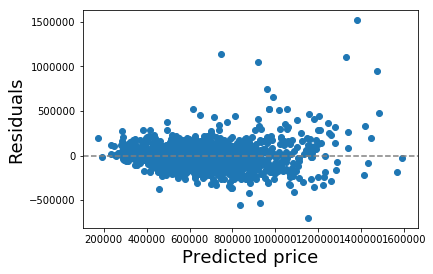

In [124]:
plt.scatter(fit.predict(), fit.resid)
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted price', fontsize=18)
plt.ylabel('Residuals', fontsize=18);

In [126]:
def rsme(y_true, y_pred):
    return np.sqrt(np.mean((y_pred - y_true)**2))
print(mae(y_train, fit.predict()))
print(rsme(y_train, fit.predict()))

106251.6395666365
154736.2784374288


In [127]:
len(features_list)

18

In [140]:
mae_list = []
rsme_list = []
for i in range(10, 19):
    model = sm.OLS(y_train, sm.add_constant(X_train[features_list[0:i]]))
    fit = model.fit()
    prediction = fit.predict(sm.add_constant(X_val[features_list[0:i]]))
    mae_list.append(mae(y_val, prediction))
    rsme_list.append(rsme(y_val, prediction))

Text(0.5, 1.0, 'Error reduction as polynomial features added')

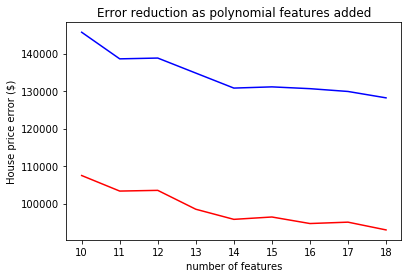

In [141]:
plt.plot(range(10, 19), mae_list, color = 'red')
plt.plot(range(10, 19), rsme_list, color = 'blue')
plt.xlabel('number of features')
plt.ylabel('House price error ($)')
plt.title('Error reduction as polynomial features added')

In [135]:
# sold^2 (square of time since sale) is adding nothing; let's not worry about that.
features_list2 = ['ZIP', 'beds', 'baths', 'size', 'lot', 'age', 'sold', 'basement', 
                 't_house', 't_townhouse', 'sizeZIP', 'sizeiftown', 
                 'bathssize', 'bathslot', 'sizesold', 'beds^2', 'age^2']
features_list2[0:10]

['ZIP',
 'beds',
 'baths',
 'size',
 'lot',
 'age',
 'sold',
 'basement',
 't_house',
 't_townhouse']

In [142]:
mae_list = []
rsme_list = []
for i in range(10, 18):
    model = sm.OLS(y_train, sm.add_constant(X_train[features_list2[0:i]]))
    fit = model.fit()
    prediction = fit.predict(sm.add_constant(X_val[features_list2[0:i]]))
    mae_list.append(mae(y_val, prediction))
    rsme_list.append(rsme(y_val, prediction))

Text(0.5, 1.0, 'Error reduction as polynomial features added')

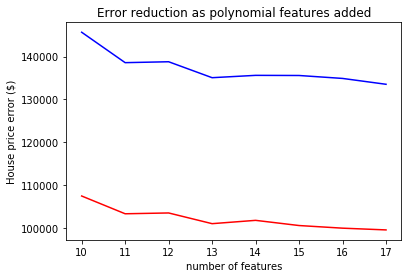

In [143]:
plt.plot(range(10, 18), mae_list, color = 'red')
plt.plot(range(10, 18), rsme_list, color = 'blue')
plt.xlabel('number of features')
plt.ylabel('House price error ($)')
plt.title('Error reduction as polynomial features added')

Discussion with Brian: this stepwise addition of features to the model is very sensitive to order; a better way to look at this would be to LASSO the 18-feature model again.

In [154]:
X_train_sc = std.transform(X_train.values)
X_val_sc = std.transform(X_val.values)

In [147]:
np.shape(X_train_sc)

(1290, 18)

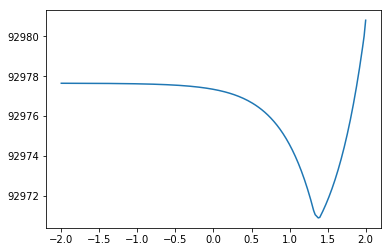

In [155]:
# Finding an alpha to minimize total error
alphalist = 10**(np.linspace(-2,2,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))
min_error = 100000
best_alpha = 0

for i,curr_alpha in enumerate(alphalist):
    lasso = Lasso(alpha = curr_alpha)
    lasso.fit(X_train_sc, y_train)
    val_set_pred = lasso.predict(X_val_sc)
    this_mae = mae(y_val, val_set_pred)
    if min_error > this_mae:
        min_error = this_mae
        best_alpha = curr_alpha
    err_vec_val[i] = this_mae

plt.plot(np.log10(alphalist), err_vec_val)

In [156]:
lasso = Lasso(best_alpha)
lasso.fit(X_train_sc, y_train)
lasso_coef_tuples = list(zip(X_train.columns, lasso_opt.coef_))
lasso_coef_tuples = sorted(lasso_coef_tuples, key = lambda x: abs(x[1]))
lasso_coef_tuples

[('ZIP', 0.0),
 ('baths', 0.0),
 ('t_house', 0.0),
 ('sizeZIP', -0.0),
 ('sizeiftown', 0.0),
 ('sold^2', 0.0),
 ('bathssize', 0.0),
 ('age', 2340.94027356314),
 ('sizesold', 2378.939034338057),
 ('age^2', -3612.4073688363237),
 ('beds^2', -6334.011805564146),
 ('sold', -12293.085362505455),
 ('t_townhouse', 14399.646328241522),
 ('basement', -24401.527639780004),
 ('size', 25171.181192192067),
 ('bathslot', 42979.41101705381),
 ('beds', 112765.60528135623),
 ('lot', 197118.63207223546)]

In [159]:
features_list3 = ['lot', 'beds', 'bathslot', 'size', 'basement', 't_townhouse', 'sold', 'beds^2', 'age^2', 'sizesold', 'age']
model = sm.OLS(y_train, X_train[features_list3])
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     1748.
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:06:23   Log-Likelihood:                -17440.
No. Observations:                1290   AIC:                         3.490e+04
Df Residuals:                    1279   BIC:                         3.496e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
lot           -30.1529      3.757     -8.026      0.000     -37.523     -22.783
beds         1.505e+05   1.72e+04      8.759      0.000    1.17e+05    1.84e+05
bathslot       10.7120      1.782      6.011      0.000       7.216      14.208
size          382.1649     15.669     24.389      0.000     351.424     412.905
basement    -3.755e+04    1.6e+04     -2.352      0.019   -6.89e+04   -6223.343
t_townhouse -6.217e+04   1.68e+04     -3.702      0.000   -9.51e+04   -2.92e+04
sold          4.91e+04   7161.697      6.857      0.000    3.51e+04    6.32e+04
beds^2      -3.201e+04   2802.807    -11.419      0.000   -3.75e+04   -2.65e+04
age^2          14.0925      5.433      2.594      0.010       3.434      24.751
sizesold      -41.1787      4.134     -9.962      0.000     -49.288     -33.069
age         -1053.2683    635.670     -1.657      0.098   -2300.338     193.802
==============================================================================
Omnibus:                      399.857   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3621.958
Skew:                           1.169   Prob(JB):                         0.00
Kurtosis:                      10.869   Cond. No.                     5.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

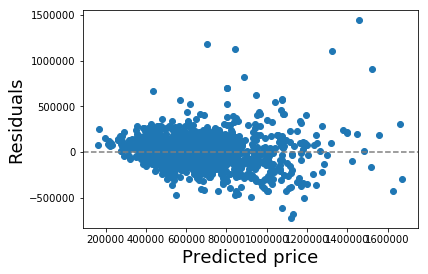

In [160]:
plt.scatter(fit.predict(), fit.resid)
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted price', fontsize=18)
plt.ylabel('Residuals', fontsize=18);

In [161]:
print(mae(y_train, fit.predict()))
print(rsme(y_train, fit.predict()))

128976.4418410965
179918.74153682255


# Modeling can't capture the intangibles
This model is rather worse than the more complicated model. Fundamentally, I didn't capture some of the features that are likely contributing substantially to the final sold price of a home (view, newness of interior, curb appeal, etc.). 

Instead of trying to figure out how much a house should be listed for, let's instead try to capture how much different first order features contribute to a house's sale price. Step one will be running LASSO on X_train2 (unchewed data set) to see if there are any features that should be tossed out and see if we agree with that.

In [168]:
y_val2

1678    775000.0
2447    599950.0
1572    549950.0
1813    750000.0
1009    720000.0
          ...   
404     445950.0
41      590000.0
2740    446950.0
753     792000.0
3074    589000.0
Name: price, Length: 430, dtype: float64

In [9]:
std = StandardScaler()
std.fit(X_train2)
X_train2_sc = std.transform(X_train2.values)
X_val2_sc = std.transform(X_val2.values)

# Finding an alpha to minimize total error
alphalist = 10**(np.linspace(-2,2,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))
min_error = 100000
best_alpha = 0

for i,curr_alpha in enumerate(alphalist):
    lasso = Lasso(alpha = curr_alpha)
    lasso.fit(X_train2_sc, y_train2)
    val_set_pred = lasso.predict(X_val2_sc)
    this_mae = mae(y_val2, val_set_pred)
    if min_error > this_mae:
        min_error = this_mae
        best_alpha = curr_alpha
    err_vec_val[i] = this_mae

plt.plot(np.log10(alphalist), err_vec_val)

/Users/chesh1/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


NameError: name 'mae' is not defined

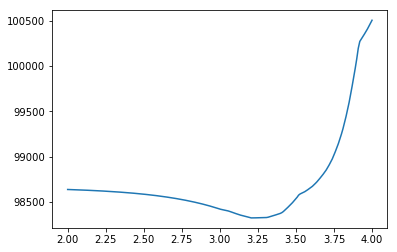

In [171]:
# Finding an alpha to minimize total error
alphalist = 10**(np.linspace(2,4,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))
min_error = 100000
best_alpha = 0

for i,curr_alpha in enumerate(alphalist):
    lasso = Lasso(alpha = curr_alpha)
    lasso.fit(X_train2_sc, y_train2)
    val_set_pred = lasso.predict(X_val2_sc)
    this_mae = mae(y_val2, val_set_pred)
    if min_error > this_mae:
        min_error = this_mae
        best_alpha = curr_alpha
    err_vec_val[i] = this_mae

plt.plot(np.log10(alphalist), err_vec_val)

In [172]:
lasso = Lasso(best_alpha)
lasso.fit(X_train2_sc, y_train2)
lasso_coef_tuples = list(zip(X_train2.columns, lasso_opt.coef_))
lasso_coef_tuples = sorted(lasso_coef_tuples, key = lambda x: abs(x[1]))
lasso_coef_tuples

[('ZIP', 0.0),
 ('baths', 0.0),
 ('t_house', 0.0),
 ('age', 2340.94027356314),
 ('sold', -12293.085362505455),
 ('t_townhouse', 14399.646328241522),
 ('basement', -24401.527639780004),
 ('size', 25171.181192192067),
 ('beds', 112765.60528135623),
 ('lot', 197118.63207223546)]

This is interesting! Basements are actually a minus (finished basement sqft worth less than main floor sqft, mayhaps?). Sold date works exactly as I'd expect, a discount for times in the past to account for inflation and increases in house prices.

Definitely surprised that location and number of baths don't matter! I wonder how much of that is homogeneity in "niceness/richness" of neighborhood within a given ZIP and how much is just that relatively little variation is accounted for by ZIP alone (i.e. houses in nicer areas also tend to be larger). That said, I think that it's important for my purposes to keep bath in; ZIP can go. We'll see what house type does after that?

In [11]:
features_list4 = ['beds', 'baths', 'size', 'age', 'sold', 'lot', 'basement', 't_house', 't_townhouse']
# X_train_val3, X_test3, y_train_val3, y_test3
model = sm.OLS(y_train_val3, X_train_val3[features_list4])
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     2597.
Date:                Sun, 11 Oct 2020   Prob (F-statistic):               0.00
Time:                        22:13:18   Log-Likelihood:                -23333.
No. Observations:                1720   AIC:                         4.668e+04
Df Residuals:                    1711   BIC:                         4.673e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
beds         -2.53e+04   7906.193     -3.201      0.001   -4.08e+04   -9797.936
baths        9.433e+04   7751.536     12.169      0.000    7.91e+04     1.1e+05
size          316.7189     13.113     24.153      0.000     291.000     342.438
age          2098.8983    169.994     12.347      0.000    1765.480    2432.317
sold         -999.2972   2934.926     -0.340      0.734   -6755.718    4757.123
lot           -10.0432      1.939     -5.180      0.000     -13.846      -6.241
basement    -8.334e+04   1.45e+04     -5.734      0.000   -1.12e+05   -5.48e+04
t_house      -1.97e+04   1.85e+04     -1.065      0.287    -5.6e+04    1.66e+04
t_townhouse -1.302e+04    1.6e+04     -0.815      0.415   -4.43e+04    1.83e+04
==============================================================================
Omnibus:                      266.877   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1898.043
Skew:                           0.520   Prob(JB):                         0.00
Kurtosis:                       8.040   Cond. No.                     2.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
fit.params

beds          -25304.759388
baths          94326.063619
size             316.718912
age             2098.898322
sold            -999.297198
lot              -10.043201
basement      -83340.493040
t_house       -19697.369214
t_townhouse   -13020.082602
dtype: float64

In [15]:
fit.conf_int()

,0,1
beds,-40811.583272,-9797.935505
baths,79122.576712,109529.550525
size,290.999560,342.438264
age,1765.480027,2432.316617
sold,-6755.717536,4757.123139
lot,-13.845796,-6.240606
basement,-111849.570099,-54831.415981
t_house,-55986.709947,16591.971520
t_townhouse,-44346.486239,18306.321036


In [ ]:
# Very much leaning on https://zhiyzuo.github.io/Python-Plot-Regression-Coefficient/ to graph coefficients w/ CI
error_bars = fit.params - fit.conf_int()[0]

In [18]:
coef_df = pd.DataFrame({'coefficient': fit.params.values,
                       'error': error_bars.values,
                       'variable': error_bars.index.values})

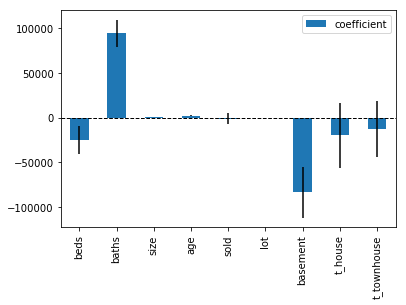

In [22]:
fig, ax = plt.subplots()
coef_df.plot(x = 'variable', y = 'coefficient', kind = 'bar', ax = ax, yerr = 'error')
ax.set_xlabel('')
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)

Essentially, we can draw a few very broad conclusions from this:
- Adding a bathroom may be quite valuable; if you feel your house needs one and you want to do the remodel, there's a good chance that the value of your house increases substantially with the addition. Don't bet on "making a profit," however; domain knowledge suggests this price bump is more likely to be realized in a 1ba house than a 3ba house.
- Adding a bedroom without increasing the square footage may knock down the house price, probably because it can make the house feel smaller and more cramped.
- An additional square foot of house added isn't going to affect the price much, but 100 square feet of living space added can have a substantial impact. Again, domain knowledge suggests that you're unlikely to turn a profit on an addition, but if you feel that the house is cramped, there's a good chance future buyers will also be willing to shell out more for the house-plus-addition.
- Basement square footage seems to be heavily discounted relative to above-ground square footage; finish a basement because you want more living space, not because it will make your house more valuable.
- Townhouses, houses, and condos are not priced significantly differently based on their beds, baths, square footage, or lot size.

Long story short, buy what works for you and do the improvements that make sense for your life. You're not in this house to turn a profit, you're in this house to have a stable living situation where you can remodel or paint the walls wild colors if you want. And unless you know a lot more than I do, you probably want to hire a realtor.